In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
drug = pd.read_csv("drug200.csv")

In [ ]:
drug.shape

(200, 6)

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


VIEW THE SUMMARY OF DATASET

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Frequency distribution of values in variables

In [ ]:
drug['Age'].value_counts()

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [ ]:
drug['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
drug['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
drug['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
drug['Na_to_K'].value_counts()

12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

In [ ]:
drug['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

check missing values in variables

In [ ]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Declare Feature vector and target variable

In [ ]:
X = drug.drop(['Drug'],axis = 1)
Y = drug['Drug']

split data into seperate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

check the shape of X_Train and X_Test

In [ ]:
X_train.shape, X_test.shape

((134, 5), (66, 5))

check datatypes in X_Train

In [ ]:
X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

Encode the categorical values

In [ ]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


all the values in variables are categorical data type

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


In [ ]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


Random Forest Classifier model with default parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


Random Forest Classifier model with parameter n_estimators=100

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, Y_train)
Y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


Finding important features with Random Forest model

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Na_to_K        0.550700
BP             0.225437
Age            0.151285
Cholesterol    0.054563
Sex            0.018015
dtype: float64

Visualize feature scores of the features

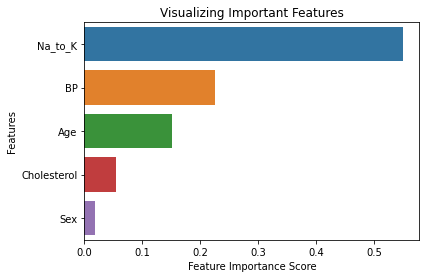

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()